# 1. Загрузка данных

In [110]:
import matplotlib.pyplot as plt
import cv2
import skimage

import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from skimage.metrics import structural_similarity

In [111]:
def draw_picture(image, title, bgr=False):
  b, g, r = cv2.split(image)
  new_image = cv2.merge([r, g, b])
  plt.figure(figsize=(7, 5))
  plt.axis('off')
  plt.imshow(new_image)
  plt.title(title)
  plt.show()

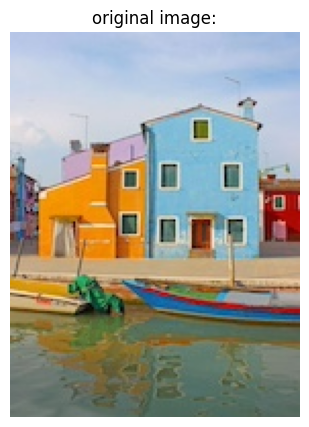

In [112]:
img = cv2.imread('1.jpg')
draw_picture(img, 'original image:')

In [113]:
height, weight, n_colors = img.shape
height, weight, n_colors

(189, 142, 3)

In [114]:
img_2d = img.reshape(height * weight, n_colors)
img_2d.shape

(26838, 3)

# 2. Модели кластеризации

## 2.1. KMeans
K = 2, 5, 10, 20

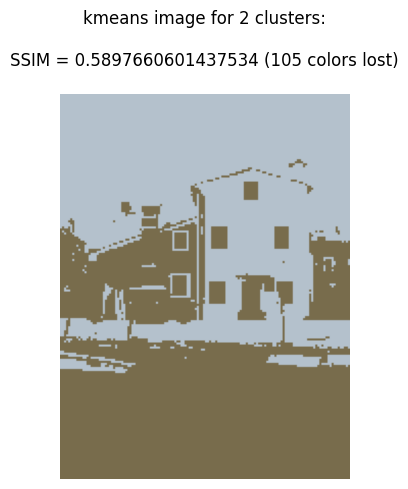

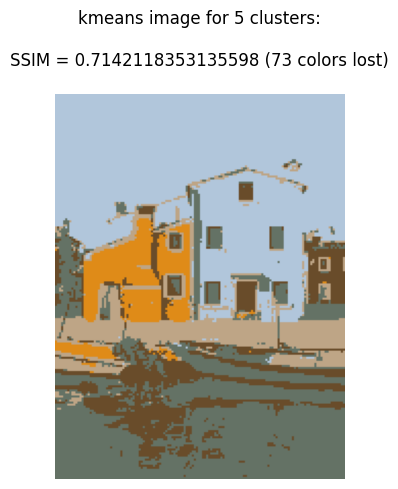

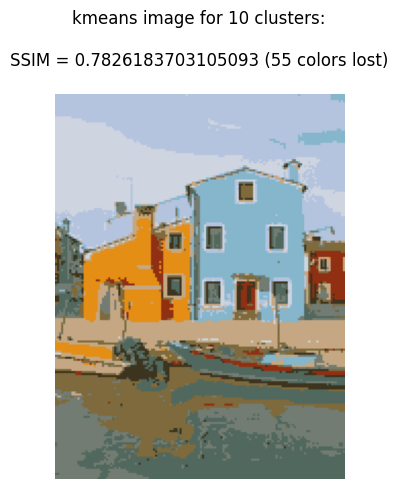

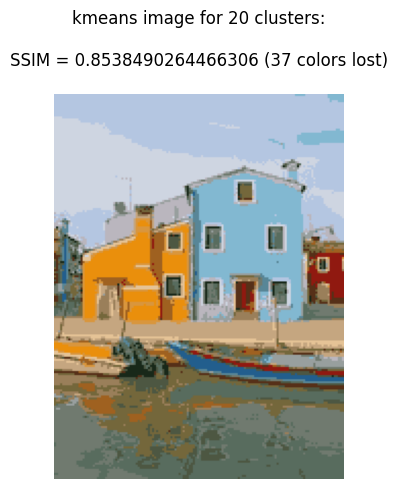

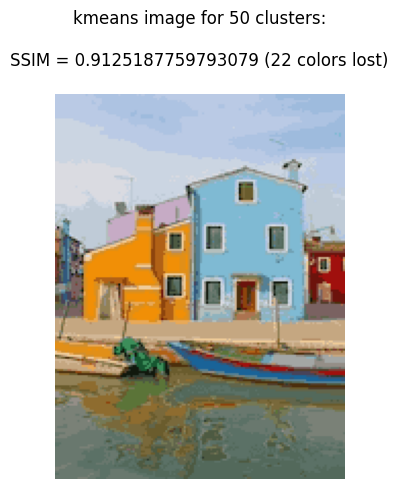

In [124]:
for k in [2, 5, 10, 20, 50]:
  model = KMeans(n_clusters=k, random_state=42, n_init=10)
  clusters = model.fit_predict(img_2d)

  img_kmeans = np.reshape(model.cluster_centers_.astype(int)[clusters],
                          (height, weight, n_colors))

  ssim = structural_similarity(img, img_kmeans, channel_axis=-1, data_range=255)
  lost = f'SSIM = {ssim} ({255 - round(ssim * 255)} colors lost)'

  draw_picture(img_kmeans, f'kmeans image for {k} clusters:\n\n{lost}\n')

## 2.2. DBSCAN

In [116]:
def get_dbscan(eps, min_samples, img_2d, img):
  centoids = {}
  model = DBSCAN(eps=eps, min_samples=min_samples)
  clusters = model.fit_predict(img_2d)
  n_clusters = len(np.unique(np.delete(clusters, np.where(clusters == -1)))) # без выбросов

  for i in range(n_clusters):
    centoids[i] = np.mean(img_2d[clusters == i], axis=0).astype(int)

  #centoids[-1] = [255, 255, 255]
  centoids = np.vstack(list(centoids.values()))

  img_dbscan = np.reshape(centoids[clusters],
                          (height, weight, n_colors))

  ssim = structural_similarity(img, img_dbscan, channel_axis=-1, data_range=255)
  lost = f'SSIM = {ssim} ({255 - round(ssim * 255)} colors lost)'

  draw_picture(img_dbscan, f'dbscan image for {n_clusters} clusters:\n\n{lost}\n')

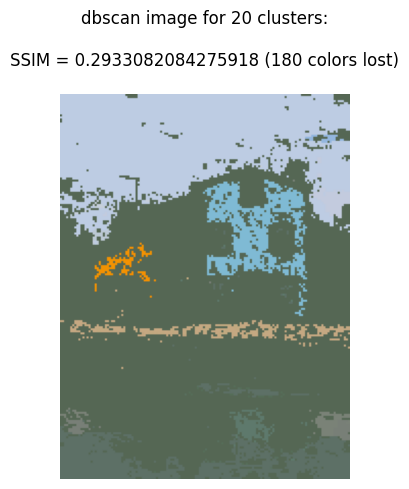

In [125]:
eps = 2
min_samples = 20

get_dbscan(eps, min_samples, img_2d, img)

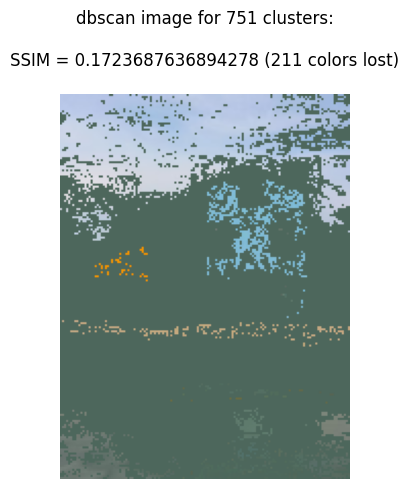

In [117]:
eps = 0.5
min_samples = 5

get_dbscan(eps, min_samples, img_2d, img)

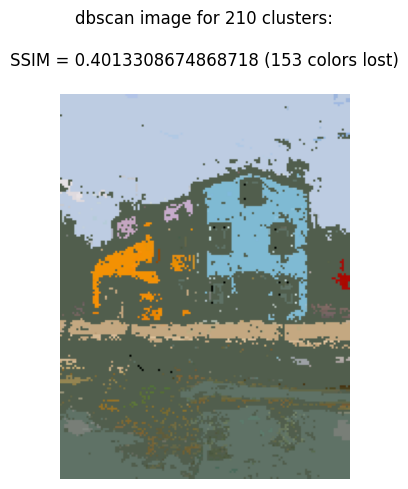

In [118]:
eps = 2
min_samples = 5

get_dbscan(eps, min_samples, img_2d, img)

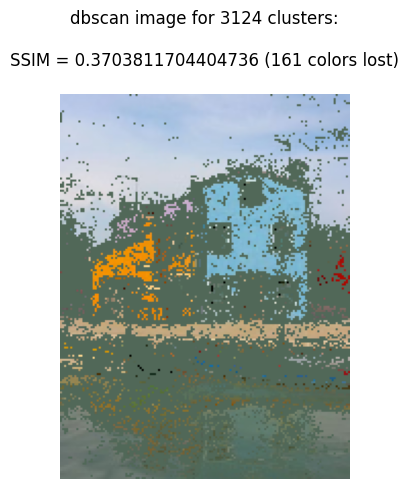

In [119]:
eps = 1
min_samples = 2

get_dbscan(eps, min_samples, img_2d, img)

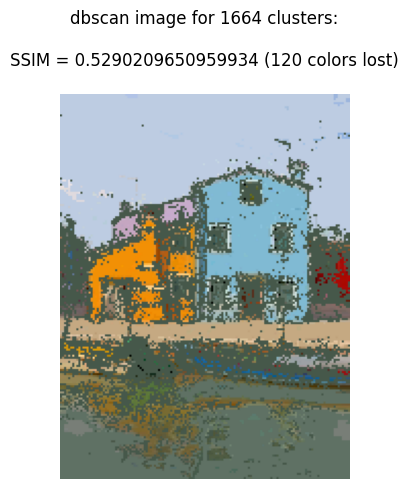

In [120]:
eps = 2
min_samples = 2

get_dbscan(eps, min_samples, img_2d, img)

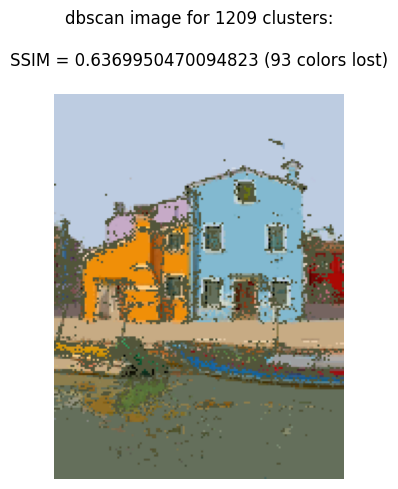

In [121]:
eps = 3
min_samples = 2

get_dbscan(eps, min_samples, img_2d, img)

## 2.3. AgglomerativeClustering
K = 2, 5, 10, 20

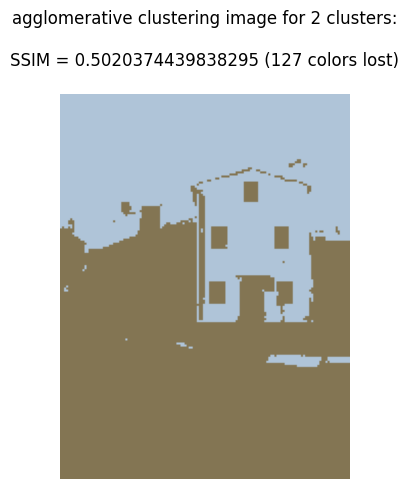

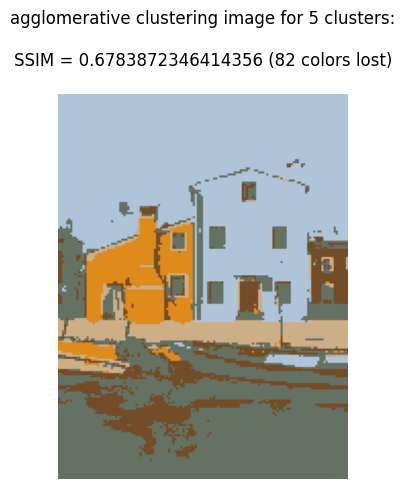

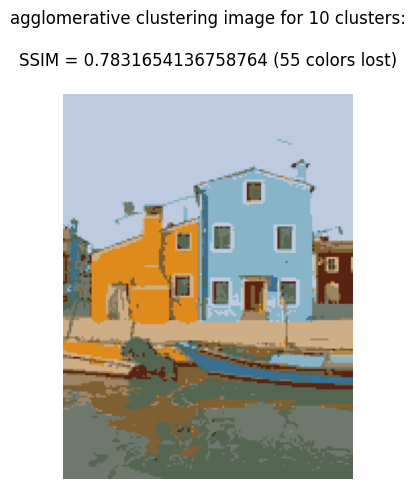

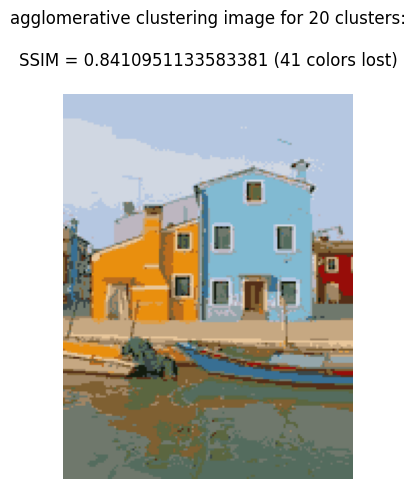

In [122]:
for k in [2, 5, 10, 20]:
  model = AgglomerativeClustering(n_clusters = k)
  clusters = model.fit_predict(img_2d)
  n_clusters = len(np.unique(clusters))

  centoids = {}
  for i in range(n_clusters):
    centoids[i] = np.mean(img_2d[clusters == i], axis=0).astype(int)

  centoids = np.vstack(list(centoids.values()))

  img_ac = np.reshape(centoids[clusters],
                          (height, weight, n_colors))

  ssim = structural_similarity(img, img_ac, channel_axis=-1, data_range=255)
  lost = f'SSIM = {ssim} ({255 - round(ssim * 255)} colors lost)'

  draw_picture(img_ac, f'agglomerative clustering image for {k} clusters:\n\n{lost}\n')

# 3. Метрика SSIM

In [ ]:
# посчитана для каждой модели с разными параметрами выше

# 4. Выводы

В случае **KMeans** картинка сильно меняется с возрастанием количества кластеров. Для 20 кластеров картинка уже сильно похожа на исходную, а потеряно всего 37 цветов.

Для 50 кластеров, например, потеряно 22 цвета.

**DBSCAN** выдает удовлетворительные результаты (когда на картинке хоть немного можно увидеть исходную) только для большого количества кластеров.

20 кластеров показывают совсем неинтересный результат, потеряно 180 цветов.

При этом необходимо указывать небольшое значение min_samples, иначе большая часть картинки попадает в категорию выбросов.

Результат работы **AgglomerativeClustering** немного хуже KMeans, для 20 кластеров потерян уже 41 цвет. Но модель все равно справилась хорошо.